# Redes dinâmicas

-  Representação, manipulação e visualização

-  Caracterização de redes dinâmicas

-  Modelagem de redes dinâmicas

por **Cibele Russo**

Baseado em 

- Eric D. Kolaczyk, Gábor Csárdi (2014). Statistical Analysis of Network Data with R, Springer.

- Cho, K., Van Merriënboer, B., Gulcehre, C., Bahdanau, D., Bougares, F., Schwenk, H., & Bengio, Y. (2014). Learning phrase representations using RNN encoder-decoder for statistical machine translation. arXiv preprint arXiv:1406.1078.

- Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.

Implementações:

- https://www.tensorflow.org/guide/keras/rnn

- https://github.com/keras-team/keras-io/blob/master/guides/working_with_rnns.py



Leituras adicionais:

- https://otexts.com/fpp2/nnetar.html



## Representação, manipulação e visualização

Redes Neurais fornecem uma nova abordagem para a modelagem de dados e consequentemente para a previsão de séries temporais.


Inspiração na biologia: Dendritos são os numerosos prolongamentos dos neurônios que atuam na recepção de estímulos nervosos do ambiente ou de outros neurônios e na transmissão desses estímulos para o corpo da célula.


<img src="N2_Neuron_Diagram.png" width=500 />
Fonte: https://www.thepartnershipineducation.com/resources/nervous-system



Podemos representar uma rede neural artificial com um único neurônio na forma de um perceptron, com duas entradas, uma saída, uma função de ativação e eventualmente um viés como abaixo. 


Neurônios artificiais: perceptron



<img src="perceptron.png" width=500 />


Já uma rede neural com vários neurônios e camadas de entrada, saída e camadas escondidas, o que dá origem a uma rede neural artificial não linear:


<img src="1BR.png" width=700 />


Cada camada de nós recebe entradas das camadas anteriores. As saídas dos nós em uma camada são entradas para a próxima camada. As entradas para cada nó são combinadas usando uma combinação linear ponderada. O resultado é então modificado por uma função não linear antes de ser produzido. Esse modelo é chamado de multilayer feed-forward network.


As entradas em um neurônio da primeria camada oculta são combinadas linearmente, por exemplo, da seguinte forma


$$z_j = b_j + \sum_{i=1}^{3}w_{i,j} x_{i}.$$


Então, na camada oculta, passam por uma função de ativação, por exemplo

$$s(z) = \displaystyle\frac{1}{1+e^{-z}}$$

e passam a ser entrada da próxima camada oculta, onde passarão por um procedimento similar e passarão para a camada de saída. Os parâmetros em cada passo são estimados de forma a minimizar, por exemplo, o erro quadrático médio.




Curiosidade: Site para visualizar algumas aplicações de redes neurais artificiais:

http://playground.tensorflow.org/




### Redes Neurais Recorrentes (RNN)

Existem diversos tipos de redes neurais artificiais que podemos utilizar para a análise de dados de séries temporais. Algumas delas são as redes neurais recorrentes (RNN), que servem para modelar dados sequenciais, como séries temporais, dados que vem de arquivos de audio, trajetórias de carros, etc. 

Para isso suponha um neurônio na multilayer feed-forward network, que permite que sua saída seja novamente uma entrada para si mesmo:


<img src="3BR.png" width=500 />


E então imagine que temos esse comportamento possível ao longo do tempo:


<img src="4BR.png" width=500 />


Dessa forma, poderíamos combinar as multilayers feed-forward networks sequencialmente. Note que existe uma espécie de memória, já que a estrutura do modelo se repete ao longo do tempo.


As RNN estão implementadas no pacote Keras em três propostas:

1. `keras.layers.SimpleRNN`, um RNN totalmente conectado, onde a saída do passo anterior no tempo deve ser alimentado para o próximo instante de tempo.

2. `keras.layers.GRU` (Gated recurrent unit) proposto por
[Cho et al., 2014](https://arxiv.org/abs/1406.1078).

3. `keras.layers.LSTM`, (Long Short Term Memory) proposto por
[Hochreiter & Schmidhuber, 1997](https://www.bioinf.jku.at/publications/older/2604.pdf).









## LSTM = Long Short-Term Memory


<img src="LSTM.png" width=600 />


Fonte: https://www.superdatascience.com/blogs/recurrent-neural-networks-rnn-long-short-term-memory-lstm


Notação

- $c_{t-1}$ representa a entrada de uma célula de memória no momento $t$;

- $x_t$ é uma entrada no ponto de tempo $t$;

- $h_t$ é uma saída no ponto de tempo $t$ que vai para a camada de saída e a camada oculta no próximo ponto de tempo.



Assim, cada bloco tem três entradas $(x_t, h_{t-1} \mbox{ e } c_{t-1})$ e duas saídas $(h_t \mbox{ e } c_t)$. É importante observar que todas essas entradas e saídas não são valores únicos, mas vetores com muitos valores por trás de cada um deles.

Para mais informações, veja [Hochreiter & Schmidhuber, 1997](https://www.bioinf.jku.at/publications/older/2604.pdf) e https://en.wikipedia.org/wiki/Long_short-term_memory .




## GRU - Gated recurrent unit

É como o LSTM simplificado, não tem porta de saída.

<img src="GRU.png" width=600 />


Fonte: https://en.wikipedia.org/wiki/Gated_recurrent_unit



<img src="rnns.png" width=600 />


Fonte: http://deeplearningbook.com.br/arquitetura-de-redes-neurais-gated-recurrent-unit-gru/\
        



## Modelagem de redes dinâmicas


Começaremos com um exemplo mais simples e depois partiremos para a RNN.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Um modelo simples do tipo  y=mx+b+ruído

In [2]:
m = 3
b = 4
x = np.linspace(0,50,100)

np.random.seed(0) 
ruído = np.random.normal(loc=0.0,scale=4.0,size=len(x))

(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([-10.21195926,  -8.28286149,  -6.35376371,  -4.42466594,
         -2.49556816,  -0.56647038,   1.36262739,   3.29172517,
          5.22082294,   7.14992072,   9.0790185 ]),
 <a list of 10 Patch objects>)

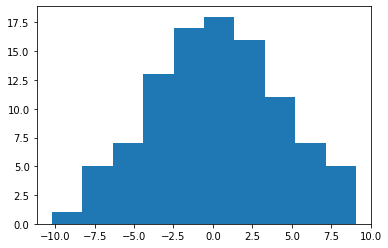

In [3]:
plt.hist(ruído)

In [4]:
y = m*x + b + ruído

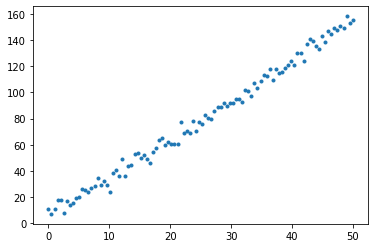

In [5]:
plt.plot(x,y,'.')

## Criação de uma rede neural para uma linha de melhor ajuste usando o pacote Keras



In [6]:
# https://keras.io/guides/sequential_model/
# Otimizadores: https://keras.io/api/optimizers/

from keras.models import Sequential
from keras.layers import Dense

In [7]:
#Vamos criar um modelo com 3 camadas

model = Sequential()

# 4 neurônios, esperando apenas 1 recurso com input_dim = 1
model.add(Dense(4, input_dim=1, activation='relu'))

# 4 neurônios (modifique para ver o resultado)
model.add(Dense(4, activation='relu'))

# Uma saída final de y, então apenas 1 neurônio
model.add(Dense(1, activation='linear'))

# Compile as camadas
model.compile(loss='mse', optimizer='adam')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 6681.0732
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 6626.9707
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 6574.6411
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 6521.6289
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 6465.8066
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 6412.7607
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 6357.2451
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 6300.0283
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 6246.6826
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 6188.1538
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 6133.6738
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 6076.1074
Epoch 13/500
4/4 [=======

4/4 [==============================] - 0s 2ms/step - loss: 622.8059
Epoch 102/500
4/4 [==============================] - 0s 2ms/step - loss: 584.7720
Epoch 103/500
4/4 [==============================] - 0s 2ms/step - loss: 551.2513
Epoch 104/500
4/4 [==============================] - 0s 2ms/step - loss: 516.8432
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 483.3974
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 449.7157
Epoch 107/500
4/4 [==============================] - ETA: 0s - loss: 555.142 - 0s 3ms/step - loss: 420.6404
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 392.0039
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 364.8694
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 339.7284
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 316.8714
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 295.1309
Epoc

4/4 [==============================] - 0s 3ms/step - loss: 17.6773
Epoch 302/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6789
Epoch 303/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6768
Epoch 304/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6753
Epoch 305/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6708
Epoch 306/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6727
Epoch 307/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6706
Epoch 308/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6685
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6687
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6689
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6685
Epoch 312/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6714
Epoch 313/500
4/4 [=======================

Epoch 402/500
4/4 [==============================] - 0s 1ms/step - loss: 17.5487
Epoch 403/500
4/4 [==============================] - 0s 1ms/step - loss: 17.5634
Epoch 404/500
4/4 [==============================] - 0s 1ms/step - loss: 17.5548
Epoch 405/500
4/4 [==============================] - 0s 1ms/step - loss: 17.5528
Epoch 406/500
4/4 [==============================] - 0s 974us/step - loss: 17.5552
Epoch 407/500
4/4 [==============================] - 0s 1ms/step - loss: 17.5396
Epoch 408/500
4/4 [==============================] - 0s 2ms/step - loss: 17.5364
Epoch 409/500
4/4 [==============================] - 0s 2ms/step - loss: 17.5429
Epoch 410/500
4/4 [==============================] - 0s 2ms/step - loss: 17.5381
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 17.5409
Epoch 412/500
4/4 [==============================] - 0s 1ms/step - loss: 17.5387
Epoch 413/500
4/4 [==============================] - 0s 867us/step - loss: 17.5396
Epoch 414/500
4/4 [=====

## Prever novos x pontos

Nosso x anterior era de 100 pontos de espaço entre 0 e 50. Vamos prever 1000 valores entre 0 e 50, desenhando uma linha para nossas previsões (nossa linha de melhor ajuste).




In [10]:
x_for_predictions = np.linspace(0,50,1000)

In [11]:
y_predicted = model.predict(x_for_predictions)

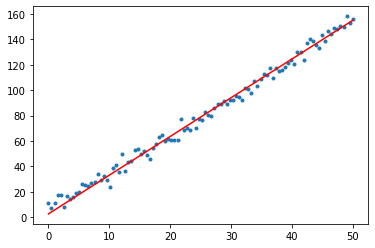

In [12]:
# X e Y originais
plt.plot(x,y,'.')

# Reta prevista
plt.plot(x_for_predictions,y_predicted,'r')

# Avaliação do erro

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [14]:

prediction_for_true_y = model.predict(x)

In [15]:
mean_squared_error(y,prediction_for_true_y)

17.408613195595734

In [16]:
mean_absolute_error(y,prediction_for_true_y)

3.339740703998877

Como interpretar esse resultado? Depende da comparação com outros modelos!

## Modelagem de séries temporais usando o Keras



In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

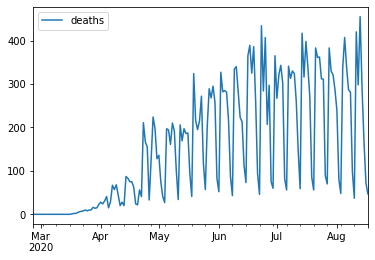

In [18]:
# Leitura dos dados de COVID-19 no estado de SP - vamos trabalhar com as mortes
# Dados até 17/8

pkgdir = '/home/cibele/CibelePython/AprendizadoDinamico/Data'

df = pd.read_csv(f'{pkgdir}/covidSP.csv', index_col='date', parse_dates=True)
df = df.drop('confirmed', axis=1)

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(idx)
df.fillna(0,inplace=True)

df.plot()

In [19]:
df

,deaths
2020-02-26,0.0
2020-02-27,0.0
2020-02-28,0.0
2020-02-29,0.0
2020-03-01,0.0
...,...
2020-08-13,455.0
2020-08-14,289.0
2020-08-15,167.0
2020-08-16,72.0


In [20]:
df.head()

,deaths
2020-02-26,0.0
2020-02-27,0.0
2020-02-28,0.0
2020-02-29,0.0
2020-03-01,0.0


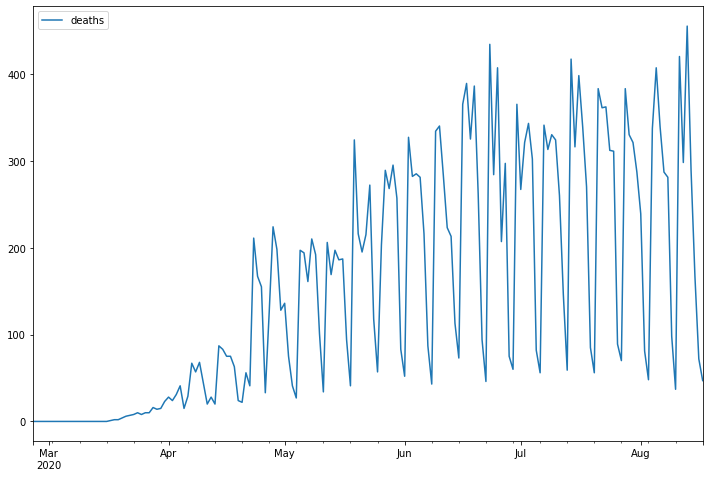

In [21]:
df.plot(figsize=(12,8))

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

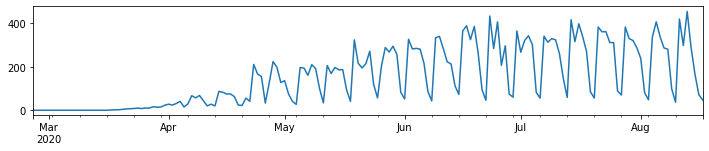

In [23]:
results = seasonal_decompose(df)
results.observed.plot(figsize=(12,2))

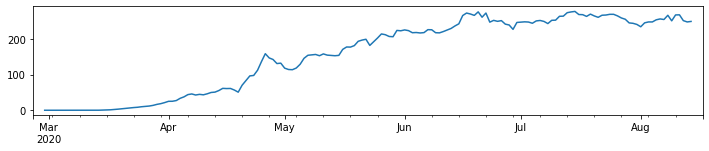

In [24]:
results.trend.plot(figsize=(12,2))

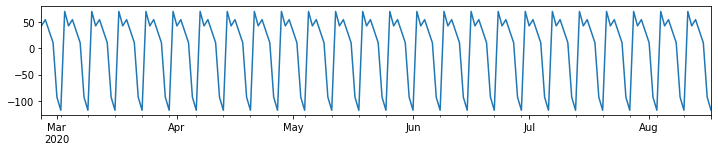

In [25]:
results.seasonal.plot(figsize=(12,2))

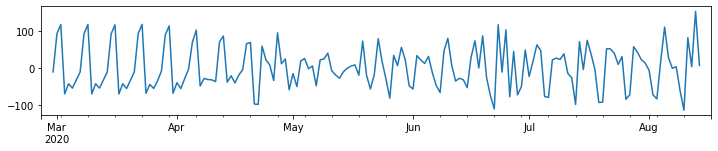

In [26]:
results.resid.plot(figsize=(12,2))

## Divida a base em treino e teste

In [27]:
len(df)-21


153

In [28]:
train = df.iloc[:153]
test = df.iloc[153:]

In [29]:
train

,deaths
2020-02-26,0.0
2020-02-27,0.0
2020-02-28,0.0
2020-02-29,0.0
2020-03-01,0.0
...,...
2020-07-23,362.0
2020-07-24,312.0
2020-07-25,311.0
2020-07-26,89.0


## Importante: Os dados precisam estar padronizados

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [34]:
print(scaled_train.min(),scaled_train.max())

0.0 1.0


In [35]:
print(scaled_test.min(),scaled_test.max())

0.08525345622119816 1.0483870967741935


(array([53., 23., 10.,  6., 17.,  4., 14., 15.,  7.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

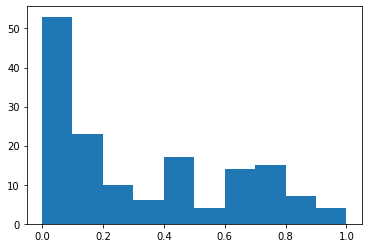

In [36]:
plt.hist(scaled_train)

### Gerador de séries temporais


In [37]:
from keras.preprocessing.sequence import TimeseriesGenerator

Sobre o gerador de séries temporais:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator

Utility class for generating batches of temporal data.

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation. Arguments

- data: Indexable generator (such as list or Numpy array) containing consecutive data points (timesteps). The data should be at 2D, and axis 0 is expected to be the time dimension.
    
- targets: Targets corresponding to timesteps in data. It should have same length as data.
    
- length: Length of the output sequences (in number of timesteps).
        
- sampling_rate: Period between successive individual timesteps within sequences. For rate r, timesteps data[i], data[i-r], ... data[i - length] are used for create a sample sequence.
    
- stride: Period between successive output sequences. For stride s, consecutive output samples would be centered around data[i], data[i+s], data[i+2*s], etc.
    
- start_index: Data points earlier than start_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
    
- end_index: Data points later than end_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
    
- shuffle: Whether to shuffle output samples, or instead draw them in chronological order.
    
- reverse: Boolean: if true, timesteps in each output sample will be in reverse chronological order.
    
- batch_size: Number of timeseries samples in each batch (except maybe the last one).
    


In [38]:
# defina o gerador
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [39]:
len(scaled_train)

153

In [40]:
len(generator) # n_input = 2

151

In [41]:
# Vamos redefinir lotes de tamanho 21 para o procedimento iterativo
# Veja mais informações sobre o tamanho do lote http://deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/

n_input = 7
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=2)

In [42]:
# Qual é a aparência do primeiro lote?
X,y = generator[0]

In [43]:
print(f'Dado o array: \n{X.flatten()}');
print(f'Previsão: \n {y}');

Dado o array: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão: 
 [[0.]
 [0.]]


### Crie o modelo

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [45]:
# Defina o modelo
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Ajuste do modelo

model.fit_generator(generator,epochs=100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0750
Epoch 2/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 3/100
73/73 [==============================] - 0s 4ms/step - loss: 0.0402
Epoch 4/100
73/73 [==============================] - 0s 4ms/step - loss: 0.0362
Epoch 5/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0333
Epoch 6/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0306
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0247
Epoch 8/100
73/73 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 9/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0223
Epoch 10/100
73/73 [==============================] - 1s 8ms/step - loss: 0.0173
Epoch 11/100
73/73 [==============================] - 1s 9ms/step - loss: 0.0161
Epoch 12/100
73/73 [======================

73/73 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 100/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0084


In [48]:
model.history.history.keys()

dict_keys(['loss'])

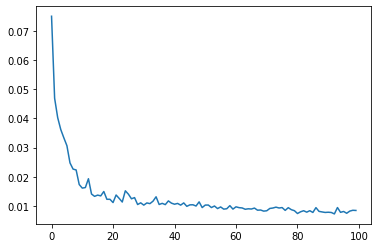

In [49]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Avalie em dados de teste

In [50]:
# Vejamos passo a passo como é feita a previsão, a princípio para a próxima observação usando o tamanho do lote igual a 7

first_eval_batch = scaled_train[-7:]

In [51]:
first_eval_batch

array([[0.88248848],
       [0.83179724],
       [0.83410138],
       [0.71889401],
       [0.71658986],
       [0.20506912],
       [0.16129032]])

In [52]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [53]:
model.predict(first_eval_batch)

array([[0.8230552]], dtype=float32)

In [54]:
scaled_test[0]

array([0.88248848])

In [55]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [56]:
current_batch.shape

(1, 7, 1)

In [57]:
current_batch

array([[[0.88248848],
        [0.83179724],
        [0.83410138],
        [0.71889401],
        [0.71658986],
        [0.20506912],
        [0.16129032]]])

In [58]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.83179724],
        [ 0.83410138],
        [ 0.71889401],
        [ 0.71658986],
        [ 0.20506912],
        [ 0.16129032],
        [99.        ]]])

In [59]:
# Agora vamos considerar as previsões para as próximas 21 observações e comparar com a base de teste

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]
    
    # predição
    test_predictions.append(current_pred) 
    
    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [60]:
test_predictions

[array([0.8230552], dtype=float32),
 array([0.7286295], dtype=float32),
 array([0.6954801], dtype=float32),
 array([0.6390744], dtype=float32),
 array([0.5796727], dtype=float32),
 array([0.20879461], dtype=float32),
 array([0.11702674], dtype=float32),
 array([0.7281073], dtype=float32),
 array([0.6496978], dtype=float32),
 array([0.6248898], dtype=float32),
 array([0.56916684], dtype=float32),
 array([0.5275231], dtype=float32),
 array([0.21944857], dtype=float32),
 array([0.13783383], dtype=float32),
 array([0.6657333], dtype=float32),
 array([0.60702676], dtype=float32),
 array([0.5841852], dtype=float32),
 array([0.54176027], dtype=float32),
 array([0.5069395], dtype=float32),
 array([0.21534875], dtype=float32),
 array([0.1375435], dtype=float32)]

In [61]:
scaled_test

array([[0.88248848],
       [0.76036866],
       [0.73963134],
       [0.66129032],
       [0.55069124],
       [0.18663594],
       [0.11059908],
       [0.7764977 ],
       [0.93778802],
       [0.78110599],
       [0.66129032],
       [0.64746544],
       [0.22580645],
       [0.08525346],
       [0.96774194],
       [0.68663594],
       [1.0483871 ],
       [0.66589862],
       [0.38479263],
       [0.16589862],
       [0.10829493]])

## Retorno da padronização e comparação

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)

In [63]:
true_predictions

array([[357.20596015],
       [316.22521579],
       [301.83836699],
       [277.35828316],
       [251.57794929],
       [ 90.61686018],
       [ 50.78960465],
       [315.99855673],
       [281.96883678],
       [271.2021693 ],
       [247.01840818],
       [228.94502556],
       [ 95.24067783],
       [ 59.81988382],
       [288.92824256],
       [263.44961202],
       [253.53636944],
       [235.12395537],
       [220.01173031],
       [ 93.46135765],
       [ 59.69387877]])

In [64]:
# Possivelmente encontraremos warnings aqui
test['Predictions'] = true_predictions

/home/cibele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
test

,deaths,Predictions
2020-07-28,383.0,357.205960
2020-07-29,330.0,316.225216
2020-07-30,321.0,301.838367
2020-07-31,287.0,277.358283
2020-08-01,239.0,251.577949
2020-08-02,81.0,90.616860
2020-08-03,48.0,50.789605
2020-08-04,337.0,315.998557
2020-08-05,407.0,281.968837
2020-08-06,339.0,271.202169


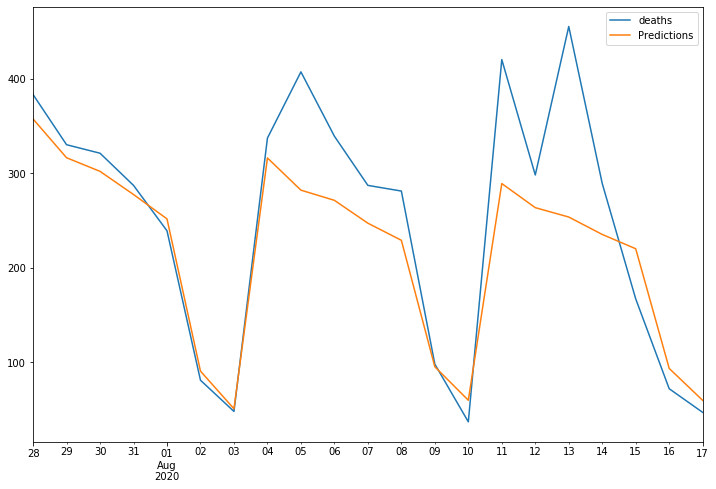

In [66]:
test.plot(figsize=(12,8))

# Você pode salvar suas previsões

In [67]:
model.save('my_rnn_model.h5')

## E carregá-las depois

In [68]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [69]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Outras formas de modelagem de séries temporais usando redes neurais artificiais:

- https://ai.facebook.com/blog/ar-net-a-simple-autoregressive-neural-network-for-time-series/

- https://otexts.com/fpp2/nnetar.html

